In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-combined'
MODEL_NAME = 'xlm-roberta-base'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df['class'].values
english_val_labels = val_df['class'].values
english_test_labels = test_df['class'].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df['class'].values
urdu_val_labels = val_df['class'].values
urdu_test_labels = test_df['class'].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df['class'].values
sindhi_val_labels = val_df['class'].values
sindhi_test_labels = test_df['class'].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

# Concatenate text arrays
train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

# Concatenate label arrays
train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

hitokilling ٿي سگهي ٿو منهنجي ايندڙ رن ۾ مس مرڻ بدران ٺاهي ڊاج ڪندو پوءِ مون کي سندس نالو ياد ايندو 0
jackposobiec date bait interviewer 0
مَیں نے سمجھ لیا تھا جنگ دوران جنگ میں حصہ لینے میں بہت زیادہ مصروف جائے گا ۔ 0
میں صرف ساحل تھا، کبھی بھی ویب میں بھی نہیں جا رہا تھا، میں وہاں رہنے قسم استعمال کیا جا رہا تھا 0
reallyvirtual آپ اس فخر کرنا چاہئے سب نے کچھ اچھا کام کیا 0


In [6]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(np.array(train_texts), np.array(train_labels), tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(np.array(val_texts), np.array(val_labels), tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:22<00:00,  4.61it/s, loss=0.273] 


Train loss 0.2666780064990182 accuracy 0.8750340647721202
Validation loss 0.2314422123102962 accuracy 0.895238562412113
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.895238562412113
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:07<00:00,  4.72it/s, loss=0.175] 


Train loss 0.21376352192249953 accuracy 0.901195809760511
Validation loss 0.22790100561088597 accuracy 0.9031034369992479
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9031034369992479
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:07<00:00,  4.72it/s, loss=0.146] 


Train loss 0.18962541968410007 accuracy 0.9142821326182455
Validation loss 0.23611834500312306 accuracy 0.9034631609928383
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9034631609928383
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:09<00:00,  4.70it/s, loss=0.113] 


Train loss 0.16753893689992103 accuracy 0.9246705255240524
Validation loss 0.2581819469950875 accuracy 0.9002910494129959
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:07<00:00,  4.72it/s, loss=0.108] 


Train loss 0.14740336685203326 accuracy 0.9352115286089582
Validation loss 0.26604297745848177 accuracy 0.9001765917786717
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:07<00:00,  4.72it/s, loss=0.0731]


Train loss 0.1298015693142194 accuracy 0.9438013015468131
Validation loss 0.3099330354922268 accuracy 0.9014029235750025
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:08<00:00,  4.71it/s, loss=0.0815]


Train loss 0.1124895222749487 accuracy 0.9524891810283745
Validation loss 0.310192423712883 accuracy 0.8954838287713791
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 2867/2867 [10:08<00:00,  4.71it/s, loss=0.038]  


Train loss 0.09595151872442009 accuracy 0.9597817674438884
Validation loss 0.3393611599609381 accuracy 0.8969717780175938
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


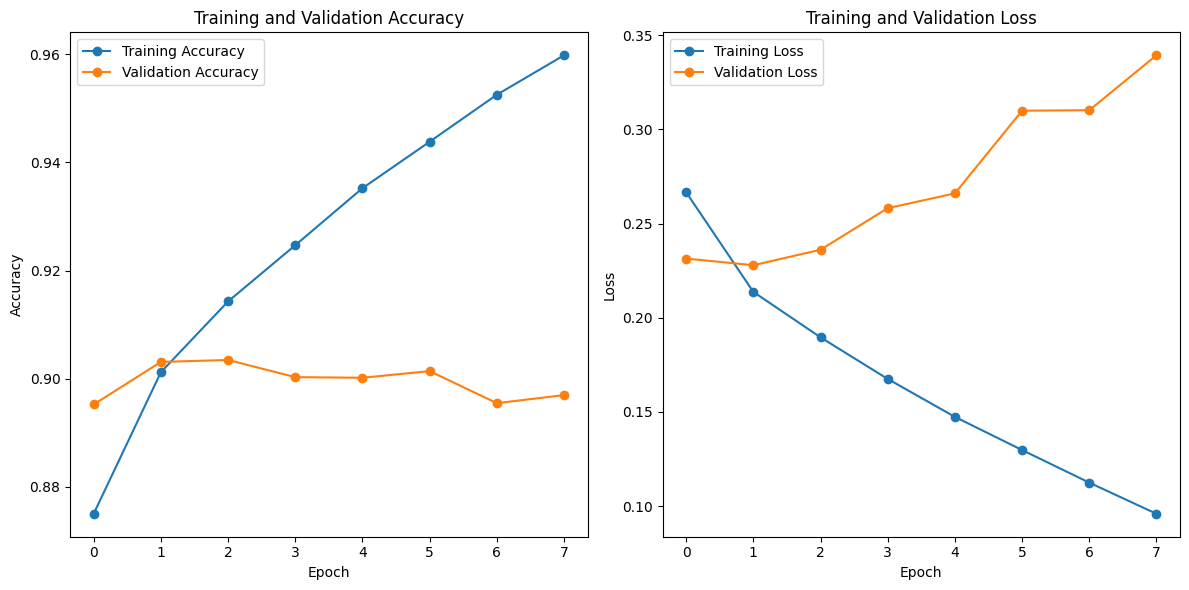

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, np.array(test_labels), tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9053645296839489 Test Loss: 0.2329487959156787


Accuracy: 0.91
F1 Score: 0.91
Precision: 0.91
Recall: 0.91

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.93      0.89      0.91     31663
        Hate       0.89      0.92      0.90     29498

    accuracy                           0.91     61161
   macro avg       0.91      0.91      0.91     61161
weighted avg       0.91      0.91      0.91     61161



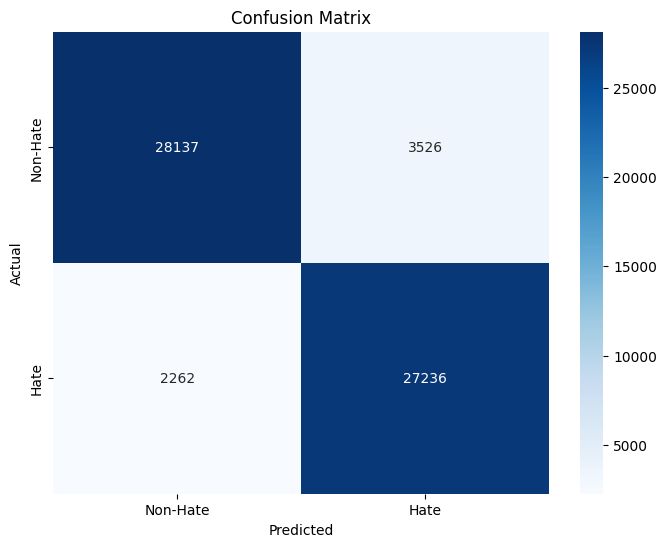

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.75
